In [4]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("C:/AI WORKSHOP/aug 21 task/salary_lasso.csv")

X = df[["experience","education_level","certifications","skills_score",
        "projects_handled","leadership_score","communication_score",
        "location_index","department_index"]]
y = df["salary_k"]


Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

m = LassoCV(cv=5, random_state=42).fit(Xtr, ytr)


coef = pd.Series(m.coef_, index=X.columns)
print("Selected:", coef[coef != 0])
print("Removed:", coef[coef == 0])



Selected: experience             2.941912
education_level        0.896169
certifications         0.014456
skills_score           0.992691
projects_handled       0.283318
leadership_score       1.805606
communication_score   -0.180128
location_index         2.763988
dtype: float64
Removed: department_index   -0.0
dtype: float64


In [5]:
# Scores
print("\nTrain R²:", m.score(Xtr, ytr))
print("Test R²:", m.score(Xte, yte))


Train R²: 0.8190560633734965
Test R²: 0.8568514803290076


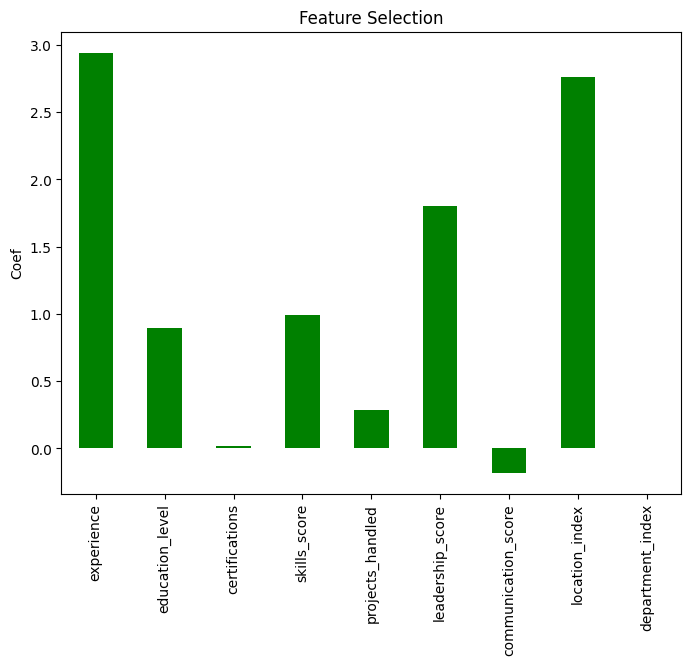

In [7]:
# Plotting
plt.figure(figsize=(8,6))
coef.plot(kind="bar", color=["g" if c!=0 else "r" for c in coef])
plt.title("Feature Selection")
plt.ylabel("Coef")
plt.show()